In [45]:
import os
from dataset import FaceIDDataset
from torch.utils.data import DataLoader
from model import FaceIDModel
from utils import display

In [46]:
data_dir = '/data/huy/faceid/'
dataset = FaceIDDataset(data_dir, train=False)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

In [47]:
faceid_model = FaceIDModel("res_net", pretrained=False)

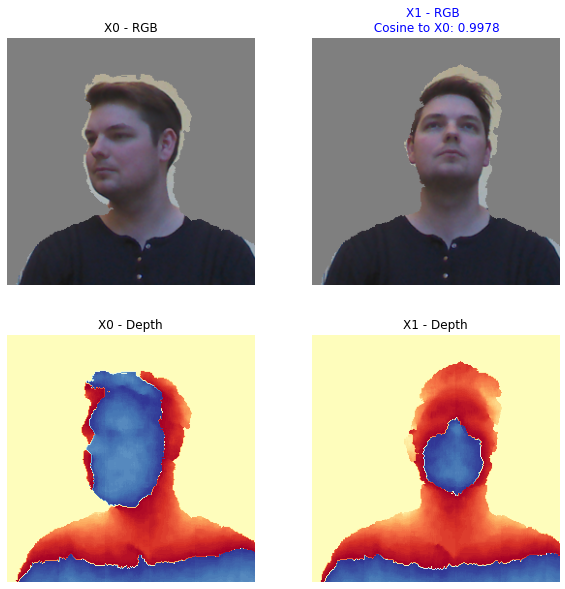

In [48]:
x0, x1, y = next(iter(dataloader))
display(faceid_model, x0, x1)